In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-and-spo2/label_4.npy
/kaggle/input/hr-and-spo2/label_23.npy
/kaggle/input/hr-and-spo2/label_44.npy
/kaggle/input/hr-and-spo2/label_65.npy
/kaggle/input/hr-and-spo2/label_42.npy
/kaggle/input/hr-and-spo2/label_50.npy
/kaggle/input/hr-and-spo2/label_61.npy
/kaggle/input/hr-and-spo2/label_7.npy
/kaggle/input/hr-and-spo2/label_54.npy
/kaggle/input/hr-and-spo2/label_31.npy
/kaggle/input/hr-and-spo2/label_58.npy
/kaggle/input/hr-and-spo2/label_15.npy
/kaggle/input/hr-and-spo2/label_26.npy
/kaggle/input/hr-and-spo2/label_57.npy
/kaggle/input/hr-and-spo2/label_45.npy
/kaggle/input/hr-and-spo2/label_33.npy
/kaggle/input/hr-and-spo2/label_36.npy
/kaggle/input/hr-and-spo2/label_22.npy
/kaggle/input/hr-and-spo2/label_2.npy
/kaggle/input/hr-and-spo2/label_20.npy
/kaggle/input/hr-and-spo2/label_34.npy
/kaggle/input/hr-and-spo2/label_30.npy
/kaggle/input/hr-and-spo2/label_5.npy
/kaggle/input/hr-and-spo2/label_64.npy
/kaggle/input/hr-and-spo2/label_27.npy
/kaggle/input/hr-and-spo2/lab

In [43]:
!pip uninstall scikit-learn -y
!pip install scikit-learn

import sklearn
print(sklearn.__version__)

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires py

1.2.2


In [34]:
import numpy as np
import os

# Initialize an empty list to store data
all_data = []

# Specify the directory where your .npy files are located
data_directory = '/kaggle/input/hr-and-spo2'  # Adjust this path as necessary

# Loop through the expected range of label files
for i in range(1, 67):  # From 1 to 66 inclusive
    file_name = f'label_{i}.npy'
    file_path = os.path.join(data_directory, file_name)
    
    # Check if the file exists
    if os.path.isfile(file_path):
        data = np.load(file_path)
        all_data.append(data)

# Concatenate all the loaded data into a single array
if all_data:  # Ensure there's data to concatenate
    all_data = np.concatenate(all_data, axis=0)
else:
    raise ValueError("No label files were found.")

# Check the shape of the concatenated data
print(all_data.shape)  # Should return (total_samples, 2)



(4647, 2)


In [35]:
# Assuming data is ordered as [HR, SpO2]
heart_rate = all_data[:, 0]  # HR in bpm
spO2 = all_data[:, 1]        # SpO2 in %

# Combine HR and SpO2 into a single feature matrix
features = np.column_stack((heart_rate, spO2))

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [36]:
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest model
model = IsolationForest(contamination = 0.03)  # Adjust contamination based on expected anomaly rate

# Fit the model on the scaled features
model.fit(features_scaled)


IsolationForest(contamination=0.03)

In [37]:
# Predict anomalies
predictions = model.predict(features_scaled)

# Anomalies are labeled as -1, and normal points as 1
anomalies = features[predictions == -1]
print("Detected anomalies:\n", anomalies)


Detected anomalies:
 [[169. 100.]
 [167. 100.]
 [166. 100.]
 [166. 100.]
 [163. 100.]
 [163. 100.]
 [163. 100.]
 [162. 100.]
 [162. 100.]
 [161. 100.]
 [161. 100.]
 [159. 100.]
 [153. 100.]
 [142. 100.]
 [142. 100.]
 [142. 100.]
 [142. 100.]
 [142. 100.]
 [128. 100.]
 [128. 100.]
 [122. 100.]
 [122. 100.]
 [122. 100.]
 [122. 100.]
 [122. 100.]
 [122. 100.]
 [123. 100.]
 [123. 100.]
 [123. 100.]
 [124. 100.]
 [127. 100.]
 [128. 100.]
 [128. 100.]
 [131. 100.]
 [131. 100.]
 [133. 100.]
 [135. 100.]
 [136. 100.]
 [136. 100.]
 [136. 100.]
 [136. 100.]
 [136. 100.]
 [134. 100.]
 [132. 100.]
 [132. 100.]
 [132. 100.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 76.  89.]
 [ 6

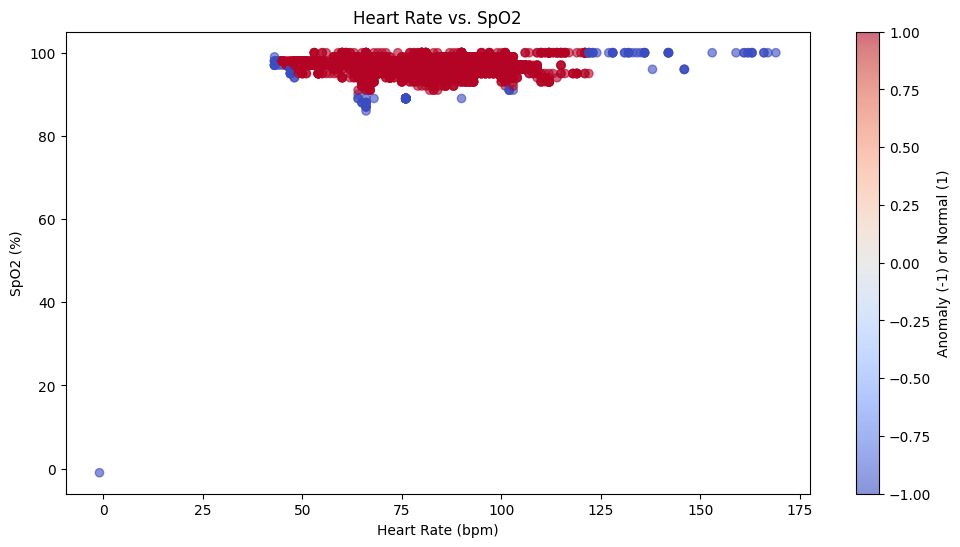

In [38]:
import matplotlib.pyplot as plt

# Plot heart rate and SpO2
plt.figure(figsize=(12, 6))
plt.scatter(heart_rate, spO2, c=predictions, cmap='coolwarm', alpha=0.6)
plt.title('Heart Rate vs. SpO2')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('SpO2 (%)')
plt.colorbar(label='Anomaly (-1) or Normal (1)')
plt.show()


In [39]:
num_anomalies = np.sum(predictions == -1)
total_samples = predictions.shape[0]

# Calculate estimated contamination
estimated_contamination = num_anomalies / total_samples
print(f"Estimated contamination level: {estimated_contamination:.4f}")

Estimated contamination level: 0.0286


In [40]:
import pickle

# Save the trained Isolation Forest model to a pickle file
with open('isolation_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [41]:
import sklearn
print(sklearn.__version__)

1.2.2
